In [12]:
# Librairies et fonctions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [5]:
# Fonction pour générer des données aléatoires pour chaque variable
def generate_data(num_samples):
    data = []
    
    # Génération des données pour l'échantillon
    for _ in range(num_samples):
        # Unité de formation et de recherche (UFR) de l'étudiant : 
        ufr = random.choice(["ST", "SEG", "LSH"])  # ST = Sciences et Technologies, SEG = Sciences Economiques et de Gestion, LSH = Lettres et Sciences Humaines

        # Filière spécifique de l'étudiant :
        filiere = random.choice(["MPCI", "SVT", "SEG", "Geographie", "LM", "HA", "Philo"])

        # Sexe de l'étudiant :
        sexe = random.choice(["Masculin", "Feminin"])

        # Niveau académique de l'étudiant :
        niveau = random.choice(["L1", "L2", "L3"])  # L1 = 1ère année de Licence, L2 = 2ème année, L3 = 3ème année

        # Fréquence d'utilisation de la connexion gratuite :
        frequency = random.choice(["Quotidienne", "Hebdomadaire", "Occasionnelle"])

        # Durée moyenne que chaque étudiant passe en ligne à chaque session, variant de 5 à 300 minutes
        duration = random.randint(5, 300)

        # Impact de la connexion sur la motivation de l'étudiant :
        motivation_impact = random.choice(["Augmenté", "Inchangé", "Diminué"])

        # La note moyenne actuelle pour évaluer la performance académique
        moyenne = random.uniform(3.50, 17.50)

        # Moyenne académique de l'étudiant avant l'accès à la connexion gratuite
        moyenne_passe = random.uniform(3.50, 17.00)

        # Moyenne académique de l'étudiant après avoir accès à la connexion gratuite (3.5 à 17.0) :
        # Cette moyenne actuelle permet d'évaluer l'impact de la connexion sur la réussite académique
        moyenne_present = random.uniform(3.50, 17.00)

        # Nombre d'heures d'étude par semaine en dehors de la connexion :
        study_hours = random.randint(1, 30)

        # Principal usage de la connexion gratuite :
        site = random.choice(["Réseaux sociax", "Recherche", "Autres"])

        # Statut de réussite :
        satut = random.choice([1, 0])

        # Ajout des données générées dans une liste de données
        data.append([ufr, filiere, sexe, niveau, frequency, duration, motivation_impact, moyenne, moyenne_passe, moyenne_present, study_hours, site, satut])

    # Création du DataFrame avec Pandas
    # Ce DataFrame contiendra toutes les données de l'échantillon, avec des colonnes représentant chaque variable
    df = pd.DataFrame(data, columns=[
        "UFR", "Filière", "Sexe", "Niveau", "Fréquence d'utilisation", 
        "Durée par session (min)", "Impact sur la motivation", "Moyenne des notes", 
        "Moyenne avant l'accès", "Moyenne actuelle", "Temps d'étude/semaine (h)", 
        "Usage de la connexion", "Statut de réussite"
    ])

    return df

# Génération de 1000 échantillons de données
df = generate_data(2000)

# Exportation vers un fichier CSV
df.to_csv("donnees_simulees.csv", index=False)

# Affichage des premières lignes pour vérifier
df.head()


,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne des notes,Moyenne avant l'accès,Moyenne actuelle,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,SEG,SEG,Feminin,L1,Hebdomadaire,244,Diminué,5.249936,13.407952,8.825940,28,Recherche,1
1,ST,SEG,Masculin,L1,Occasionnelle,129,Diminué,6.144661,15.282522,16.920565,15,Autres,0
2,SEG,LM,Masculin,L2,Quotidienne,226,Inchangé,9.486128,11.855917,8.668369,19,Autres,0
3,SEG,SVT,Feminin,L3,Occasionnelle,156,Augmenté,8.054654,15.697960,10.906281,19,Recherche,0
4,LSH,Philo,Feminin,L2,Occasionnelle,79,Inchangé,14.845084,5.182176,8.522963,12,Autres,0


In [7]:
df = pd.read_csv('donnees_simulees.csv')
df.head()

,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne des notes,Moyenne avant l'accès,Moyenne actuelle,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,SEG,SEG,Feminin,L1,Hebdomadaire,244,Diminué,5.249936,13.407952,8.825940,28,Recherche,1
1,ST,SEG,Masculin,L1,Occasionnelle,129,Diminué,6.144661,15.282522,16.920565,15,Autres,0
2,SEG,LM,Masculin,L2,Quotidienne,226,Inchangé,9.486128,11.855917,8.668369,19,Autres,0
3,SEG,SVT,Feminin,L3,Occasionnelle,156,Augmenté,8.054654,15.697960,10.906281,19,Recherche,0
4,LSH,Philo,Feminin,L2,Occasionnelle,79,Inchangé,14.845084,5.182176,8.522963,12,Autres,0


## Analyse de la forme

In [8]:
# Nombre de ligne et colone
df.shape

(2000, 13)

In [9]:
# Type de variable
df.dtypes.value_counts()

object     7
int64      3
float64    3
Name: count, dtype: int64

<Axes: >

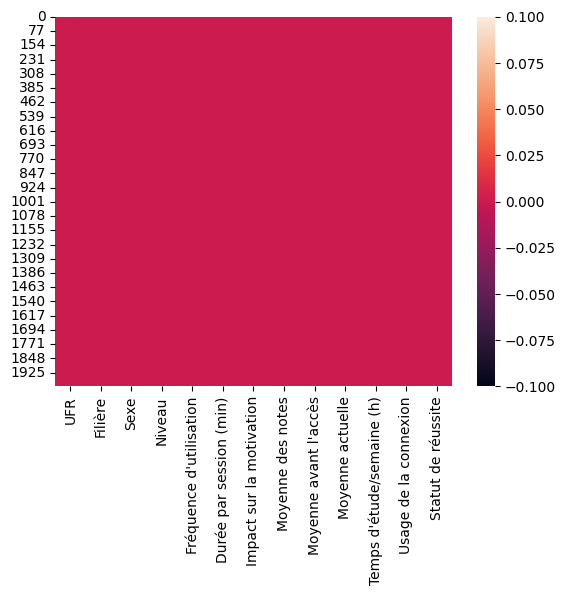

In [13]:
# Les valeurs manquante
sns.heatmap(df.isna())

In [16]:
# Examen de la variable cible
df['Statut de réussite'].value_counts(normalize=True)

Statut de réussite
0    0.501
1    0.499
Name: proportion, dtype: float64

## Analyse du fond

C:\Users\Ramzy Mr 17\AppData\Local\Temp\ipykernel_3000\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ramzy Mr 17\AppData\Local\Temp\ipykernel_3000\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ramzy Mr 17\AppData\Local\Temp\ip

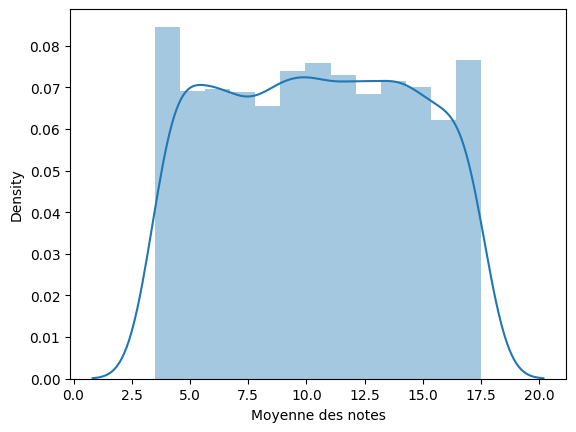

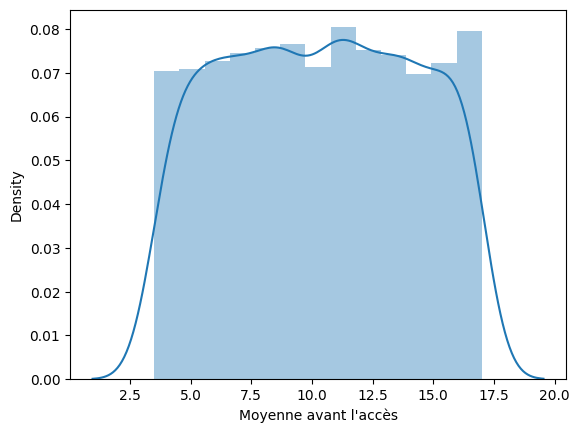

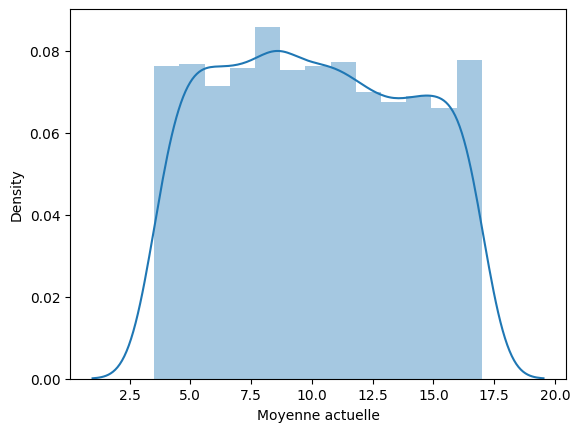

In [17]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [18]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

UFR----------------------------------------------- ['SEG' 'ST' 'LSH']
Filière------------------------------------------- ['SEG' 'LM' 'SVT' 'Philo' 'MPCI' 'HA' 'Geographie']
Sexe---------------------------------------------- ['Feminin' 'Masculin']
Niveau-------------------------------------------- ['L1' 'L2' 'L3']
Fréquence d'utilisation--------------------------- ['Hebdomadaire' 'Occasionnelle' 'Quotidienne']
Impact sur la motivation-------------------------- ['Diminué' 'Inchangé' 'Augmenté']
Usage de la connexion----------------------------- ['Recherche' 'Autres' 'Réseaux sociax']


## Relation Target / Variables

### Relation Target / UFR

<Axes: xlabel='UFR', ylabel='count'>

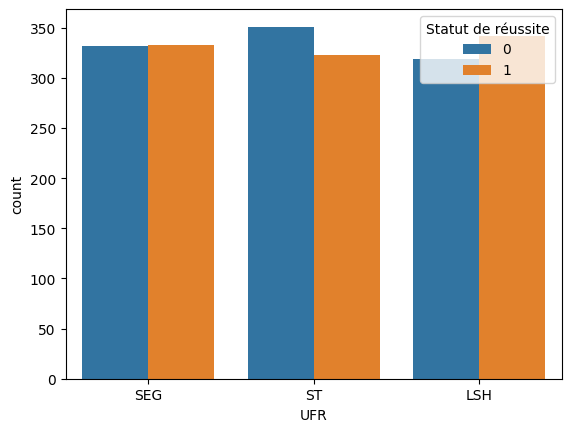

In [22]:
sns.countplot(x='UFR', hue='Statut de réussite', data=df)


<Axes: xlabel='Filière', ylabel='count'>

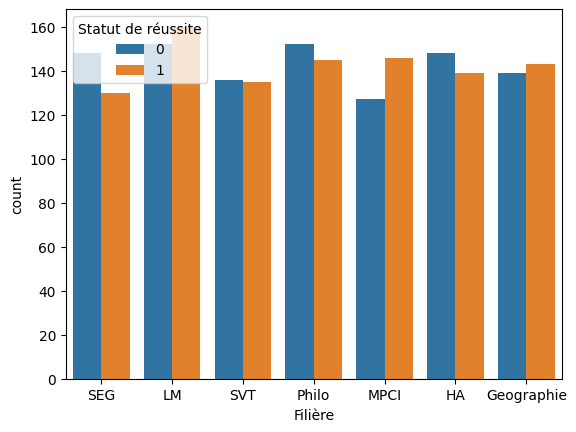

In [23]:
sns.countplot(x='Filière', hue='Statut de réussite', data=df)

<Axes: xlabel='Niveau', ylabel='count'>

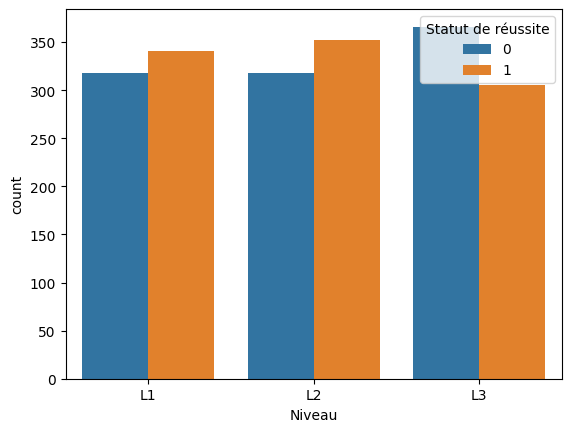

In [24]:
sns.countplot(x='Niveau', hue='Statut de réussite', data=df)

<Axes: xlabel="Fréquence d'utilisation", ylabel='count'>

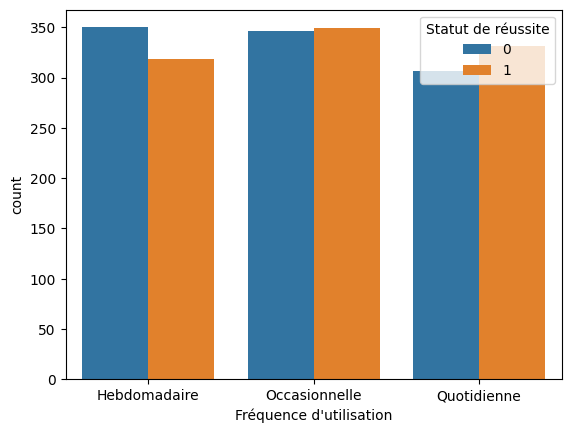

In [ ]:
sns.countplot(x="Fréquence d'utilisation", hue='Statut de réussite', data=df)

<Axes: xlabel='Impact sur la motivation', ylabel='count'>

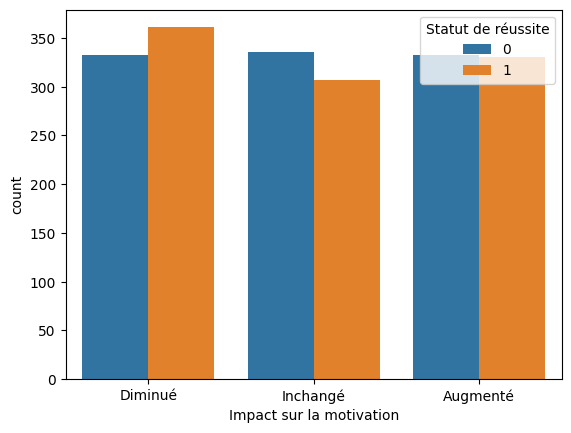

In [26]:
sns.countplot(x='Impact sur la motivation', hue='Statut de réussite', data=df)

<Axes: xlabel='Usage de la connexion', ylabel='count'>

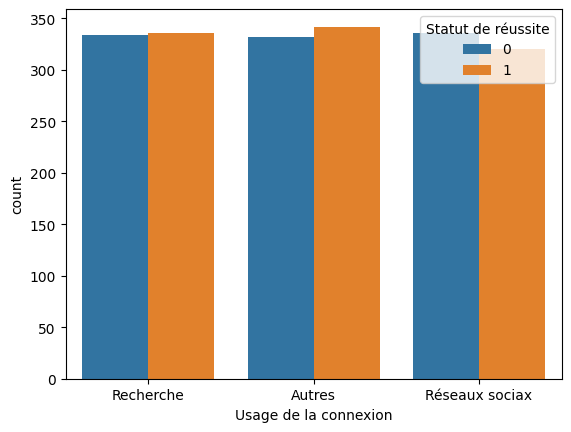

In [27]:
sns.countplot(x='Usage de la connexion', hue='Statut de réussite', data=df)